Filip Nikolić 1641 2. seminarski rad

Import-ovanje neophodnih biblioteka

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from scipy.ndimage import rotate, shift, zoom
from keras.preprocessing.image import ImageDataGenerator
import cv2
import imgaug.augmenters as iaa

/Users/filipnikolic/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Demonstracija geometrijskih transformacija

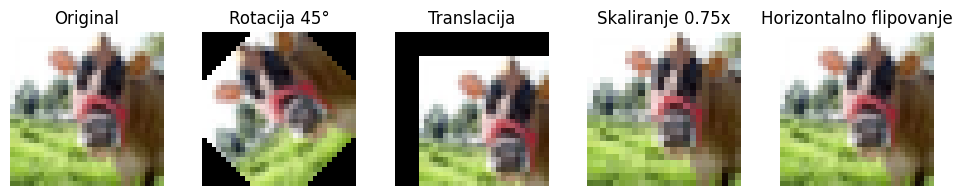

In [2]:
# Učitavanje CIFAR-100 dataset-a
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Izaberimo jednu sliku za demonstraciju
image = x_train[0]

# Funkcija za vizualizaciju
def plot_images(images, titles, figsize=(12, 2), rows=1, interp=False):
    fig, axes = plt.subplots(nrows=rows, ncols=len(images), figsize=figsize)
    if rows == 1:
        axes = np.array([axes])
    for i, ax in enumerate(axes.flat):
        if images[i].shape[-1] == 3:
            ax.imshow(images[i], interpolation=None if interp else 'none')
        else:
            ax.imshow(images[i].reshape(images[i].shape[0], images[i].shape[1]), cmap='gray', interpolation=None if interp else 'none')
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

# Rotacija
rotated_image = rotate(image, angle=45, reshape=False)

# Translacija
translated_image = shift(image, shift=[5, 5, 0])

# Skaliranje
scaled_image = zoom(image, zoom=[0.75, 0.75, 1])

# Horizontalno flipovanje koristeći ImageDataGenerator
flip_gen = ImageDataGenerator(horizontal_flip=True)
flip_image_iter = flip_gen.flow(np.array([image])) # Pretvaramo sliku u batch veličine 1
flip_image = next(flip_image_iter)[0].astype('uint8')

# Vizualizacija
plot_images(
    [image, rotated_image, translated_image, scaled_image, flip_image],
    ['Original', 'Rotacija 45°', 'Translacija', 'Skaliranje 0.75x', 'Horizontalno flipovanje']
)

Demonstracija promene osvetljenja i boja

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


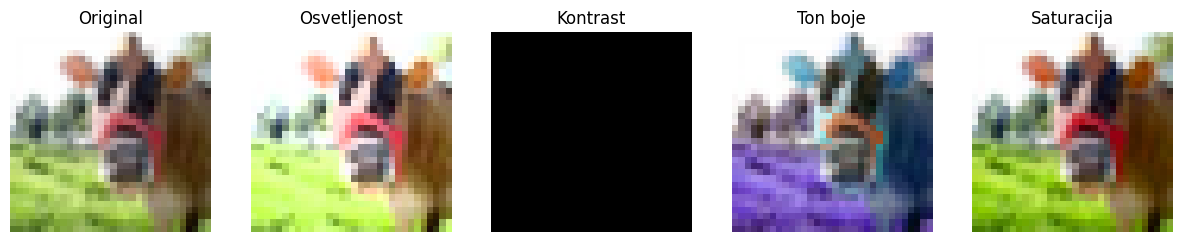

In [3]:
# Učitavanje CIFAR-100 dataset-a
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalizacija slika
x_train = x_train.astype('float32') / 255.0

# Izaberimo jednu sliku za demonstraciju
image = x_train[0]

# Funkcija za promenu kontrasta koristeći OpenCV
def adjust_contrast(image, contrast=1.5):
    f = 131 * (contrast + 127) / (127 * (131 - contrast))
    alpha_c = f
    gamma_c = 127*(1-f)
    return cv2.addWeighted(image, alpha_c, image, 0, gamma_c)

# Funkcija za promenu osvetljenosti
def adjust_brightness(image, value=0.2):
    hsv = cv2.cvtColor((image*255).astype(np.uint8), cv2.COLOR_RGB2HSV)
    hsv = hsv.astype(np.float32)
    hsv[..., 2] = hsv[..., 2]*value
    hsv[..., 2] = np.clip(hsv[..., 2], 0, 255)
    hsv = hsv.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB) / 255

# Funkcija za promenu tona boje
def change_hue(image, hue_shift_value):
    image_hsv = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2HSV)
    image_hsv[:, :, 0] = (image_hsv[:, :, 0] + hue_shift_value) % 180
    return cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB) / 255

# Funkcija za promenu saturacije
def adjust_saturation(image, saturation=1.5):
    image_hsv = cv2.cvtColor((image * 255).astype('uint8'), cv2.COLOR_RGB2HSV).astype(np.float32)
    image_hsv[:, :, 1] = image_hsv[:, :, 1] * saturation
    image_hsv[:, :, 1] = np.clip(image_hsv[:, :, 1], 0, 255)
    return cv2.cvtColor(image_hsv.astype(np.uint8), cv2.COLOR_HSV2RGB) / 255

# Primena promena
contrast_image = adjust_contrast(image, contrast=1.5)
brightness_image = adjust_brightness(image, value=1.5)
hue_image = change_hue(image, 90)
saturation_image = adjust_saturation(image, saturation=1.5)

# Prikazivanje slika
titles = ['Original', 'Osvetljenost', 'Kontrast', 'Ton boje', 'Saturacija']
images = [image, brightness_image, contrast_image, hue_image, saturation_image]

plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()

Demonstracija random cropping-a i resize-ovanja

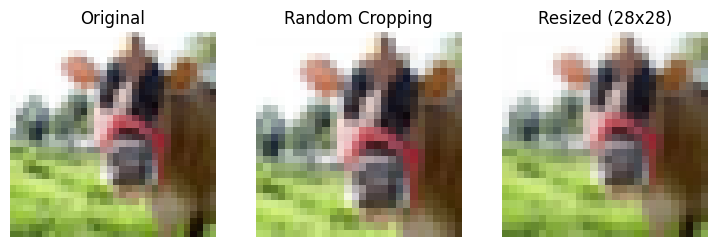

In [4]:
# Učitavanje CIFAR-100 dataset-a
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Izaberimo jednu sliku za demonstraciju (normalizujemo sliku za prikaz)
image = x_train[0] / 255.0

# Funkcija za random cropping
def random_crop(img, crop_size=(28, 28)):
    h, w = img.shape[:2]
    top = np.random.randint(0, h - crop_size[0])
    left = np.random.randint(0, w - crop_size[1])
    bottom = top + crop_size[0]
    right = left + crop_size[1]
    cropped_img = img[top:bottom, left:right]
    return cropped_img

# Funkcija za resizing
def resize_image(img, size=(28, 28)):
    resized_img = cv2.resize(img, size, interpolation=cv2.INTER_LINEAR)
    return resized_img

# Primena random croppinga
cropped_image = random_crop(image)

# Primena resizinga
resized_image = resize_image(image, size=(28, 28))

# Prikazivanje slika
titles = ['Original', 'Random Cropping', 'Resized (28x28)']
images = [image, cropped_image, resized_image]

plt.figure(figsize=(9, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()

Demonstracija dodavanja šuma

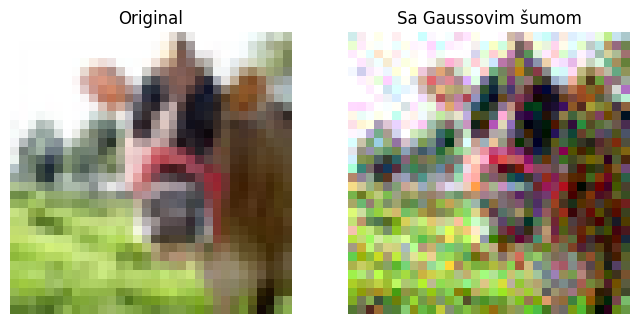

In [5]:
# Učitavanje CIFAR-100 dataset-a
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Izaberimo jednu sliku za demonstraciju
image = x_train[0]

# Funkcija za dodavanje Gaussovog šuma na sliku
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Ograničavamo vrednosti da ostanu u validnom opsegu
    return noisy_image.astype('uint8')

# Pretvaranje slike u float format za manipulaciju
image_float = image.astype('float32')

# Dodavanje šuma
noisy_image = add_gaussian_noise(image_float)

# Prikaz originalne i šumne slike
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title("Sa Gaussovim šumom")
plt.axis('off')

plt.show()

Demonstracija filtera i efekata

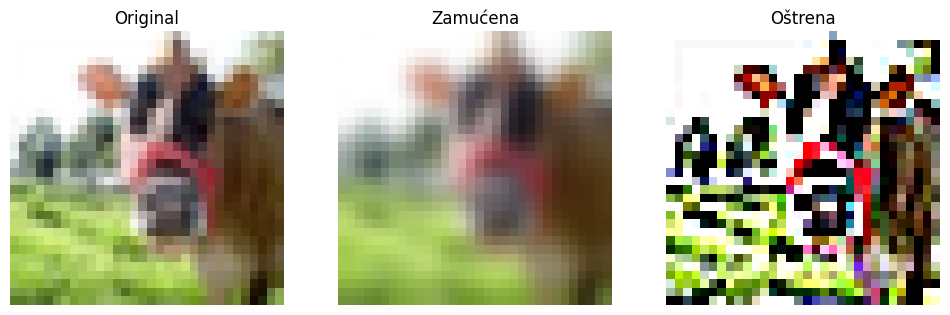

In [6]:
# Učitavanje CIFAR-100 dataset-a
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Izaberimo jednu sliku za demonstraciju
image = x_train[0]

# Zamućenje slike koristeći Gaussovo zamućenje
def blur_image(image):
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred_image

# Oštrenje slike
def sharpen_image(image):
    kernel_sharpening = np.array([[-1, -1, -1],
                                  [-1,  9, -1],
                                  [-1, -1, -1]])
    sharpened_image = cv2.filter2D(image, -1, kernel_sharpening)
    return sharpened_image

# Primena zamućenja i oštrenja
blurred_image = blur_image(image)
sharpened_image = sharpen_image(image)

# Prikaz originalne, zamućene i oštrene slike
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred_image)
plt.title("Zamućena")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_image)
plt.title("Oštrena")
plt.axis('off')

plt.show()

Demonstracija elastičnih transformacija

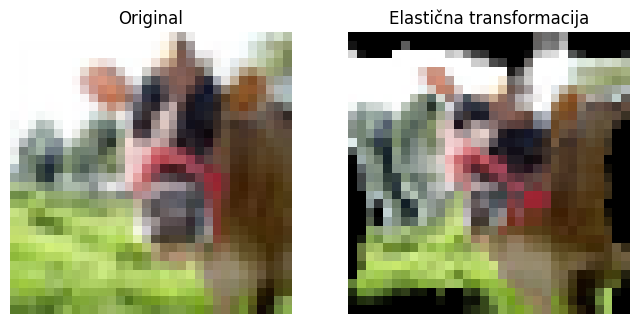

In [7]:
# Učitavanje CIFAR-100 dataset-a
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Izaberimo jednu sliku za demonstraciju
image = x_train[0]

# Definisanje augmentera za elastičnu transformaciju
elastic_transformer = iaa.ElasticTransformation(alpha=50, sigma=5)

# Primena elastične transformacije na sliku
elastic_image = elastic_transformer.augment_image(image)

# Prikaz originalne i transformisane slike
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(elastic_image)
plt.title("Elastična transformacija")
plt.axis('off')

plt.show()